Text(0.5, 0.98, 'Time series')

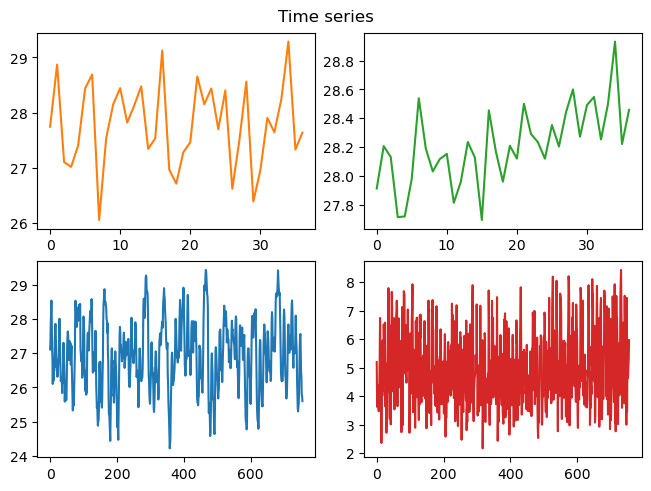

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import rfft, rfftfreq

data1 = np.genfromtxt("../datasets/sampledata.txt", usecols=0)
data2 = np.genfromtxt("../datasets/sampledata2.txt", usecols=0)
data3 = np.genfromtxt("../datasets/sampledata3.txt", usecols=3)
data4 = np.genfromtxt("../datasets/sampledata4.txt", usecols=3)

def modifyOutlier(data):
    """
    This function is used to process the errors in data
    The errors is found based on the outlier
    The ouliters are then modified by 
    """
    data1 = data.copy()
    p25 = np.percentile(data, 25)
    p75 = np.percentile(data, 75)
    iqr = p75 - p25
    maxOutlier = p75 + iqr*1.5
    minOutlier = p25 - iqr*1.5
    outList = np.append(np.where(minOutlier>data)[0],np.where(maxOutlier<data)[0])
    for i in outList:
        if i == len(data)-1:
            data1[i] = (data[i-1] + data[0])/2
        else:
            data1[i] = (data[i-1] + data[i+1])/2
    return (data1)

data3new = modifyOutlier(data3)
data4new = modifyOutlier(data4)

fig, axs = plt.subplots(2,2, layout="constrained")
fig.add_gridspec(2, 2, hspace=10, wspace=10)
axs[0][0].plot(data1,'tab:orange',label = "Data 1")
axs[0][1].plot(data2,'tab:green',label = "Data 2")
axs[1][0].plot(data3new,'tab:blue',label = "Data 3")
axs[1][1].plot(data4new,'tab:red',label = "Data 4")
fig.suptitle('Time series')

Text(0.5, 0.98, 'Power density spectra')

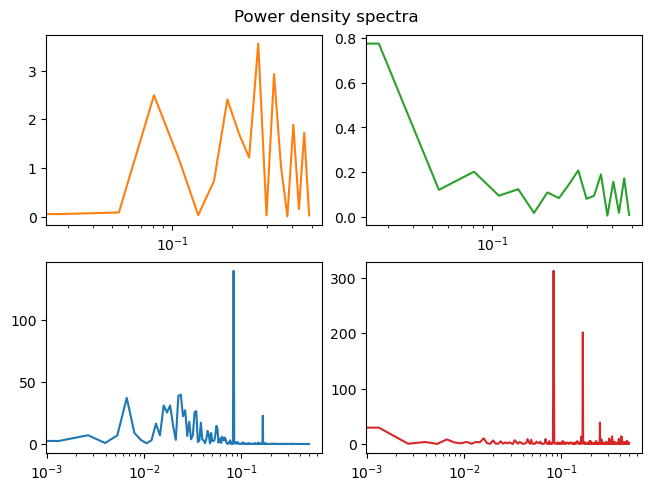

In [2]:
f0,s0 = signal.periodogram(data1)
f1,s1 = signal.periodogram(data2)
f2,s2 = signal.periodogram(data3new)
f3,s3 = signal.periodogram(data4new)
fig, axs = plt.subplots(2,2, layout="constrained")
fig.add_gridspec(2, 2)
axs[0][0].semilogx(f0,s0,'tab:orange')
axs[0][1].semilogx(f1,s1,'tab:green')
axs[1][0].semilogx(f2,s2,'tab:blue')
axs[1][1].semilogx(f3,s3,'tab:red')
fig.suptitle('Power density spectra')